<a href="https://colab.research.google.com/github/Aayushgupta218/Bird-Striking-Analysis-project/blob/main/birdsproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# BIRD PROJECT

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bird Strikes data.xlsx - Bird Strikes.csv',encoding='unicode_escape')

In [ ]:
# Data cleaning

pd.isnull(data)
pd.isnull(data).sum()
threshold = 0.3
data = data.dropna(thresh=len(data) * threshold, axis=1)

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

categorical_cols = data.select_dtypes(include=['object', 'bool']).columns
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

data['Wildlife: Number struck'] = data['Wildlife: Number struck'].fillna(0)

df = data.ffill()

data.shape
data.head()
data.info()

pd.isnull(data).sum()

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))
# csv_file = 'cleaned_Bird_data.csv'
# data.to_csv(csv_file,index = False)
# from google.colab import files
# files.download(csv_file)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25558 non-null  object
 2   Airport: Name                            25558 non-null  object
 3   Altitude bin                             25558 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25558 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   FlightDate                               25558 non-null  object
 8   Effect: Indicated Damage                 25558 non-null  object
 9   Aircraft: Number of engines?             25558 non-null  object
 10  Aircraft: Airline/Operator               25558 non-null  o

Distribution of Indicated Damage:
 Effect: Indicated Damage
1    23081
0     2477
Name: count, dtype: int64


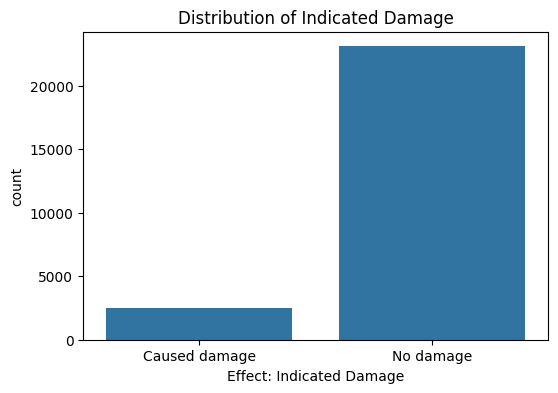

In [ ]:
target = 'Effect: Indicated Damage'
print("Distribution of Indicated Damage:\n", data[target].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=target, data=df)
plt.title('Distribution of Indicated Damage')
plt.show()

In [ ]:
correlation = data.corr()[target].sort_values(ascending=False)
print("Correlation with Indicated Damage:\n", correlation)

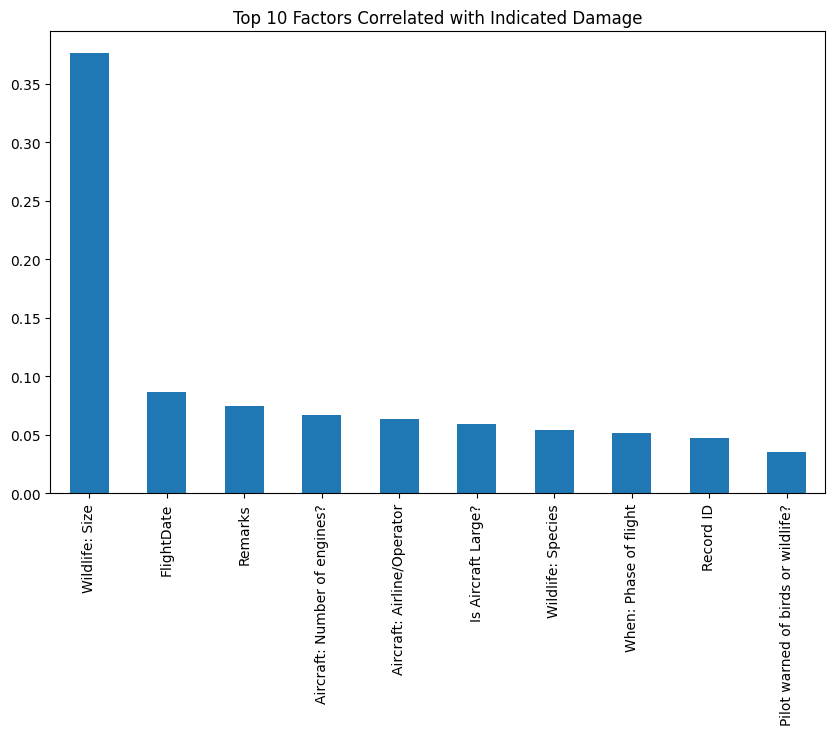

In [ ]:
plt.figure(figsize=(10,6))
correlation.drop(target).nlargest(10).plot(kind='bar')
plt.title('Top 10 Factors Correlated with Indicated Damage')
plt.show()

In [ ]:
X = data.drop(target, axis=1)
y = data[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
feature_importances = model.feature_importances_
important_features = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

In [ ]:
print("Top 10 Important Features:\n", important_features.head(10))
plt.figure(figsize=(10,6))
important_features.head(10).plot(kind='barh')
plt.title('Top 10 Important Features for Predicting Indicated Damage')
plt.show()

In [ ]:
# Model evaluation
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9289906103286385

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.36      0.50       499
           1       0.93      0.99      0.96      4613

    accuracy                           0.93      5112
   macro avg       0.87      0.67      0.73      5112
weighted avg       0.92      0.93      0.92      5112



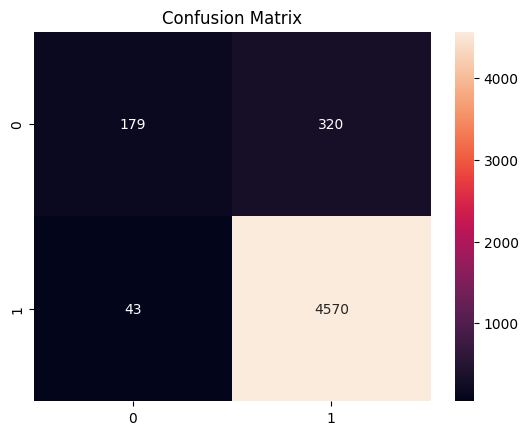

In [ ]:
# Confusion Matrix for model
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()


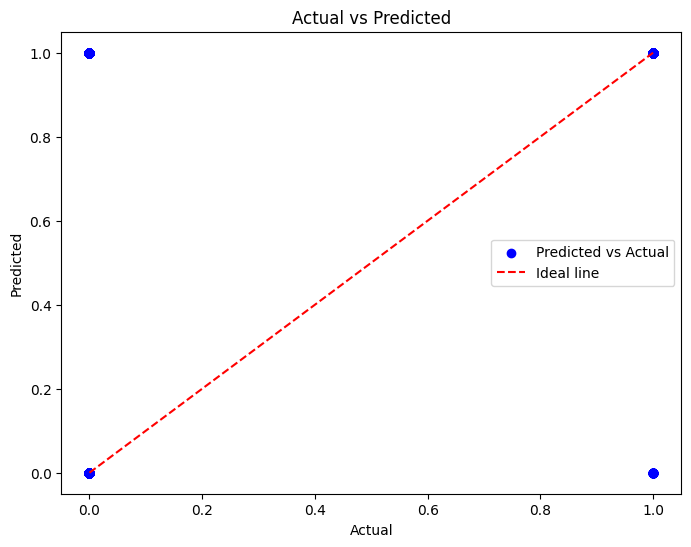

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--', label='Ideal line')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()

plt.show()

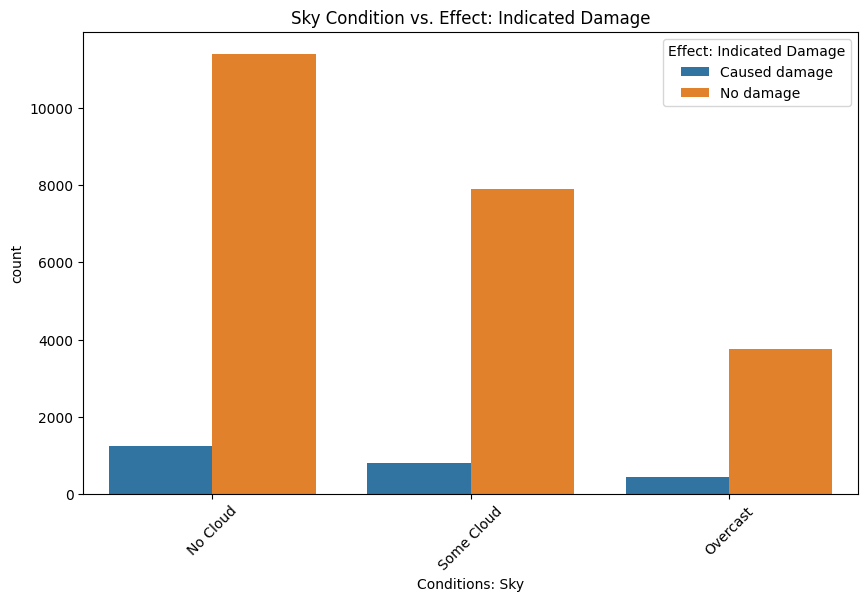

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Conditions: Sky', hue='Effect: Indicated Damage', data=df)
plt.title('Sky Condition vs. Effect: Indicated Damage')
plt.xticks(rotation=45)
plt.show()

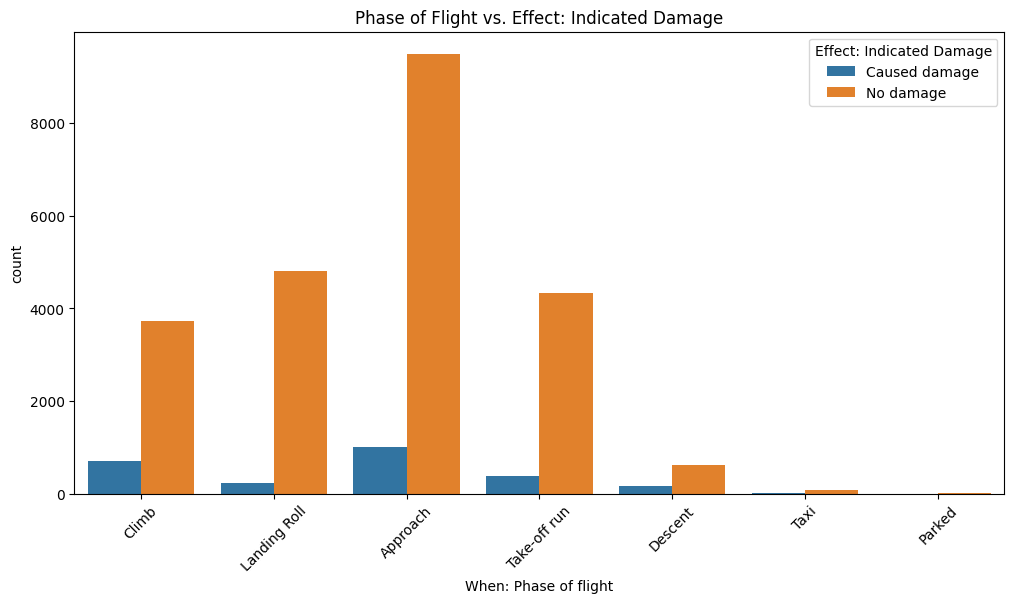

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='When: Phase of flight', hue='Effect: Indicated Damage', data=df)
plt.title('Phase of Flight vs. Effect: Indicated Damage')
plt.xticks(rotation=45)
plt.show()


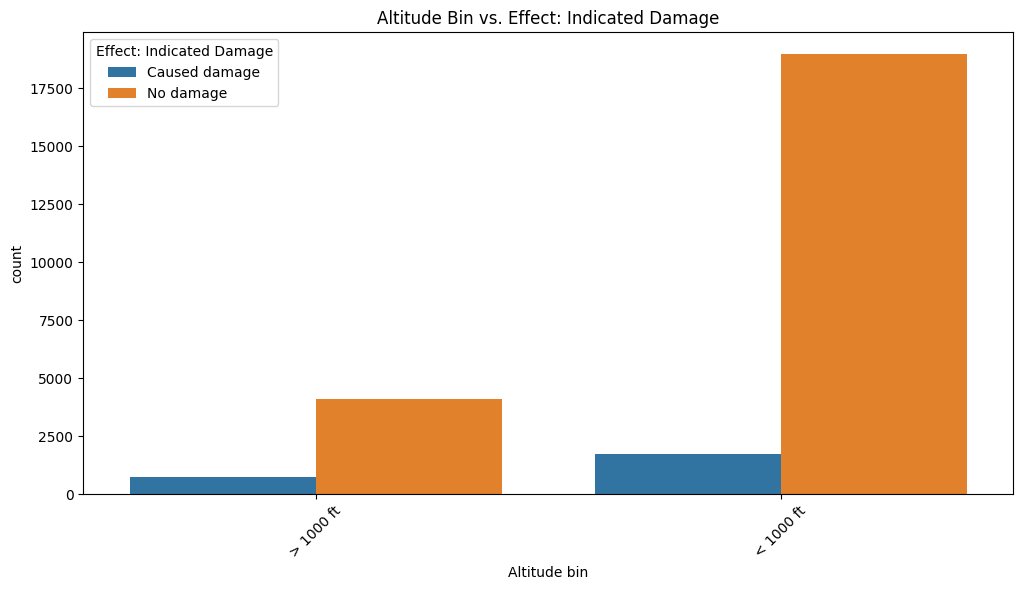

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Altitude bin', hue='Effect: Indicated Damage', data=df)
plt.title('Altitude Bin vs. Effect: Indicated Damage')
plt.xticks(rotation=45)
plt.show()


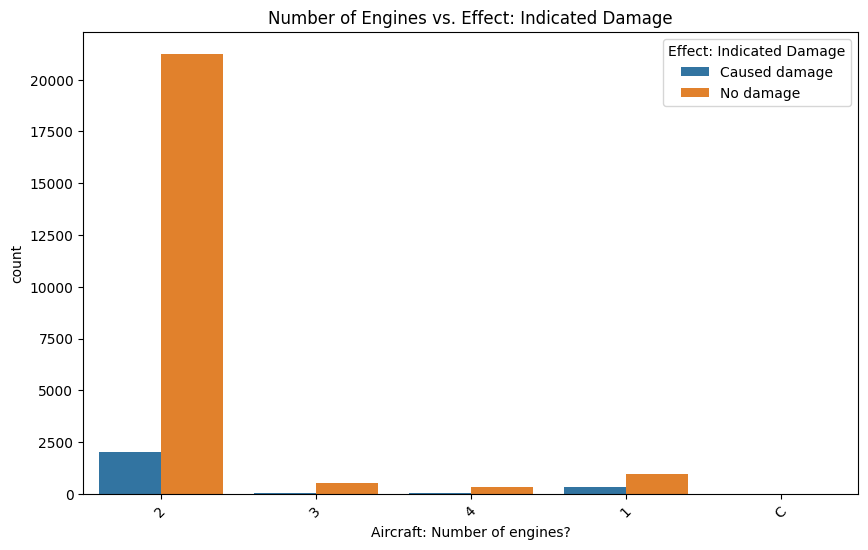

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Aircraft: Number of engines?', hue='Effect: Indicated Damage', data=df)
plt.title('Number of Engines vs. Effect: Indicated Damage')
plt.xticks(rotation=45)
plt.show()


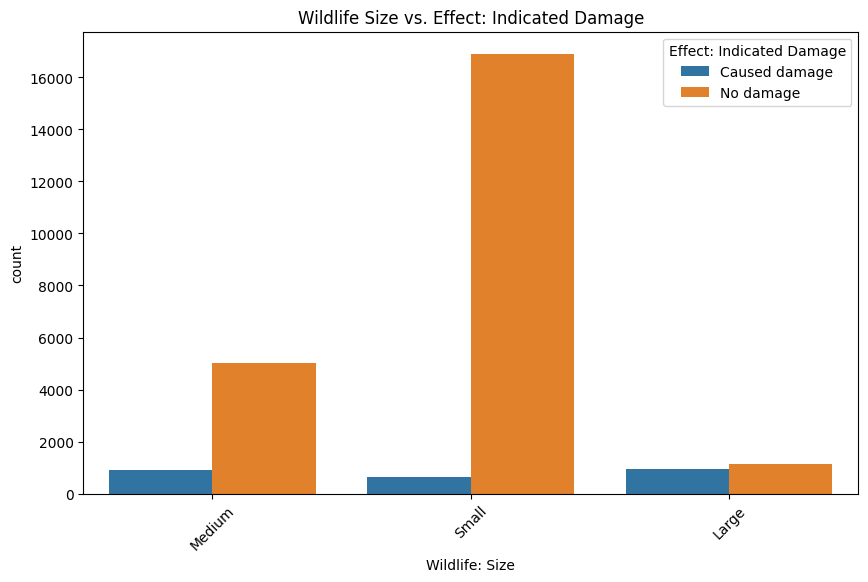

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Wildlife: Size', hue='Effect: Indicated Damage', data=df)
plt.title('Wildlife Size vs. Effect: Indicated Damage')
plt.xticks(rotation=45)
plt.show()


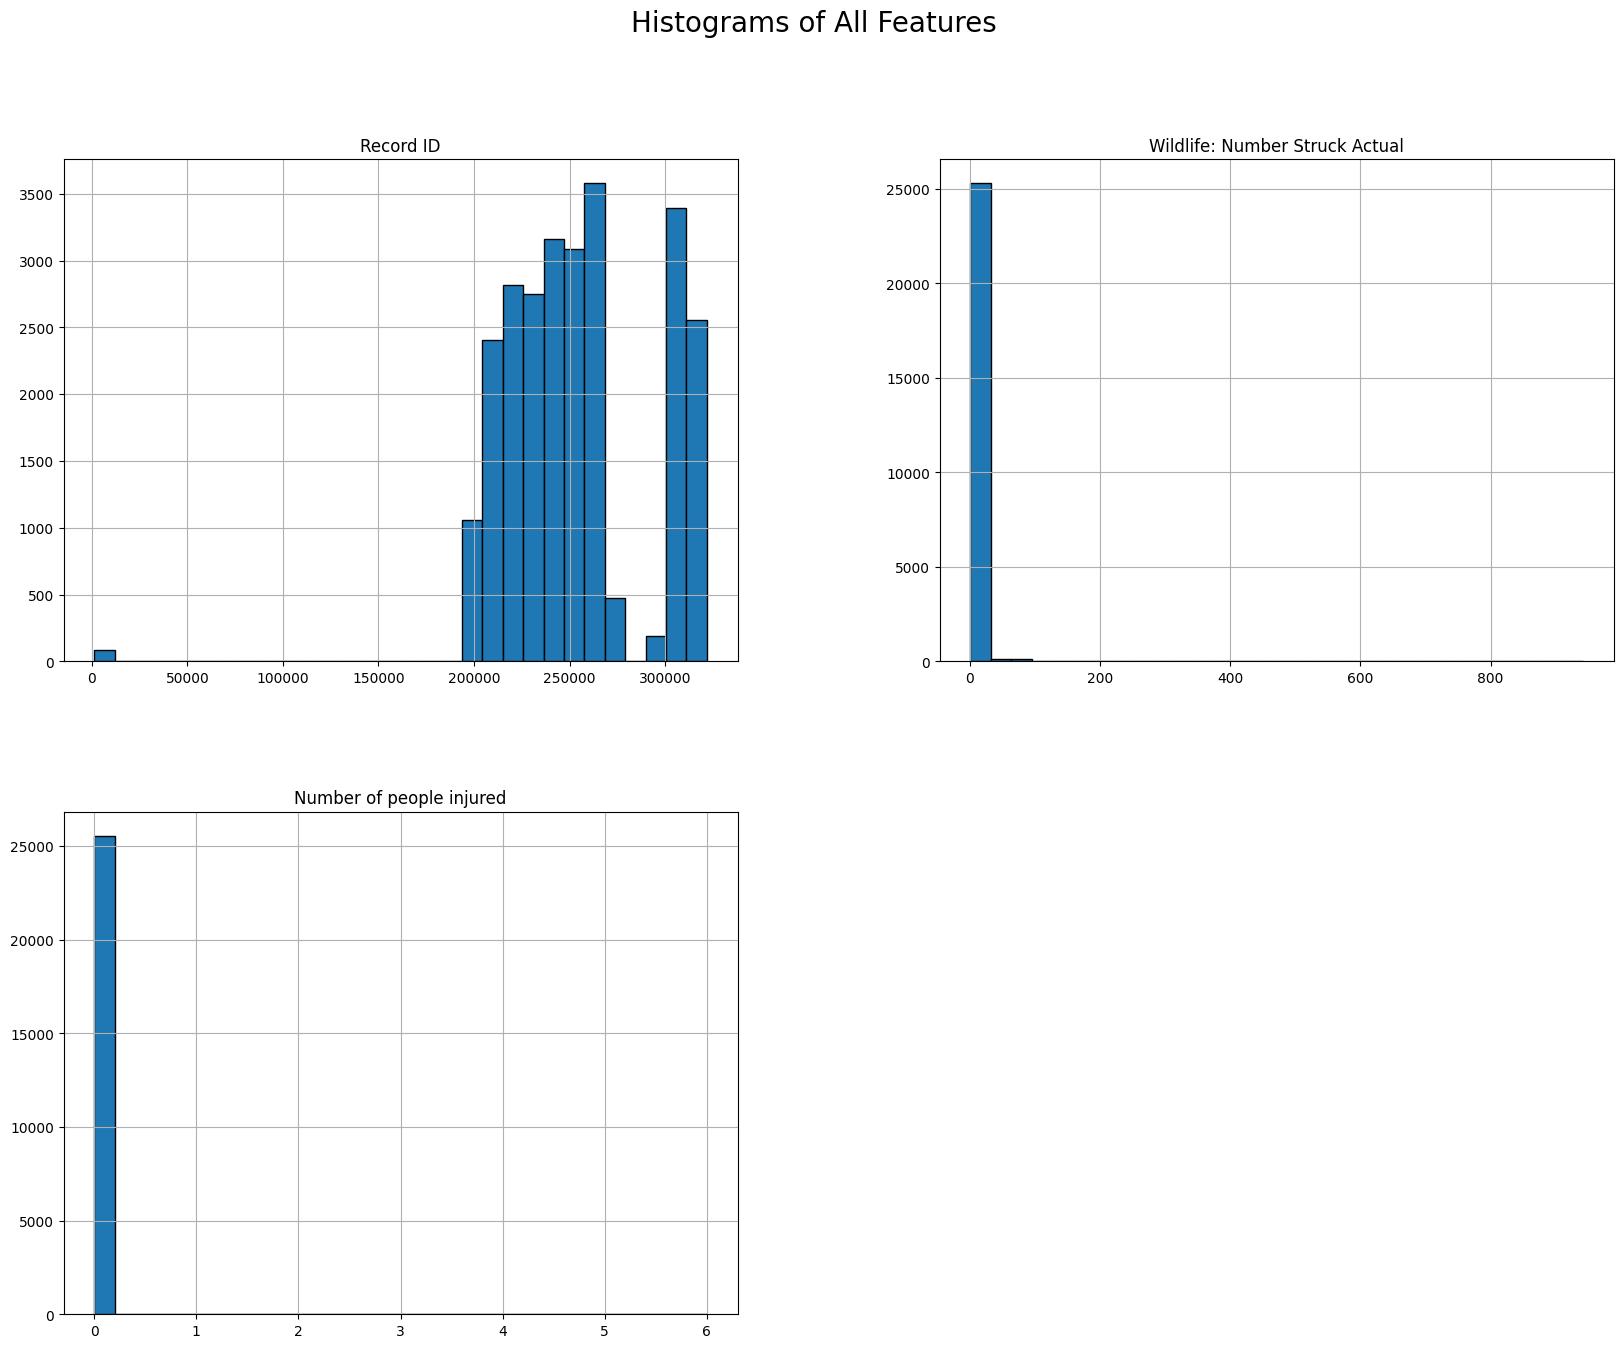

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature
df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle('Histograms of All Features', fontsize=20)
plt.show()
